In [1]:
import multiprocessing
import pickle
import os
from tqdm import tqdm
from matplotlib import pyplot as plt
import torch

def process_file(file_path):
    """
    Process a single file to extract scene_id and episode_id.
    """
    try:
        if file_path.endswith(".pkl"):
            with open(file_path, 'rb') as f:
                data = pickle.load(f)
        elif file_path.endswith(".pt"):
            data = torch.load(file_path)
        return data.get('scene_id'), data.get('episode_id')

    except Exception as e:
        print(f"Error processing file {file_path}: {e}")
        return None, None

def extract_ids_with_progress(directory):
    scene_ids = []
    episode_ids = []

    # Create a list of file paths to process
    file_paths = [os.path.join(root, file) for root, dirs, files in os.walk(directory) 
                  for file in files if file.endswith(".pt")]
    print(len(file_paths))

    # Initialize a multiprocessing pool
    pool = multiprocessing.Pool(processes=multiprocessing.cpu_count())

    # Process files in parallel with a progress bar
    for scene_id, episode_id in tqdm(pool.imap_unordered(process_file, file_paths), total=len(file_paths)):
        if scene_id is not None:
            scene_ids.append(scene_id)
        if episode_id is not None:
            episode_ids.append(episode_id)

    # Close the pool
    pool.close()
    pool.join()

    return scene_ids, episode_ids

def plot_histograms(scene_ids, episode_ids):
    # Plotting
    plt.figure(figsize=(12, 6))

    # Scene IDs histogram
    plt.subplot(1, 2, 1)
    plt.hist(scene_ids, bins=20, color='blue', alpha=0.7)
    plt.title('Scene IDs Histogram')
    plt.xlabel('Scene ID')
    plt.ylabel('Frequency')

    # Episode IDs histogram
    plt.subplot(1, 2, 2)
    plt.hist(episode_ids, bins=len(set(episode_ids)), color='green', alpha=0.7)
    plt.title('Episode IDs Histogram')
    plt.xlabel('Episode ID')
    plt.ylabel('Frequency')

    plt.tight_layout()
    plt.show()



In [ ]:
# Note: This script should be run in a script file, not in an interactive environment like Jupyter Notebook,
# as multiprocessing and tqdm might not display the progress bar correctly in such environments.
directory = "/srv/flash1/pputta7/projects/lm-nav/data/datasets/lmnav/offline_10envs_karmesh_clip"
scene_ids, episode_ids = extract_ids_with_progress(directory)
plot_histograms(scene_ids, episode_ids) # This function can be called to plot the histograms after extraction.

48797


 16%|█████████████████████▋                                                                                                                     | 7607/48797 [05:53<26:00, 26.39it/s]

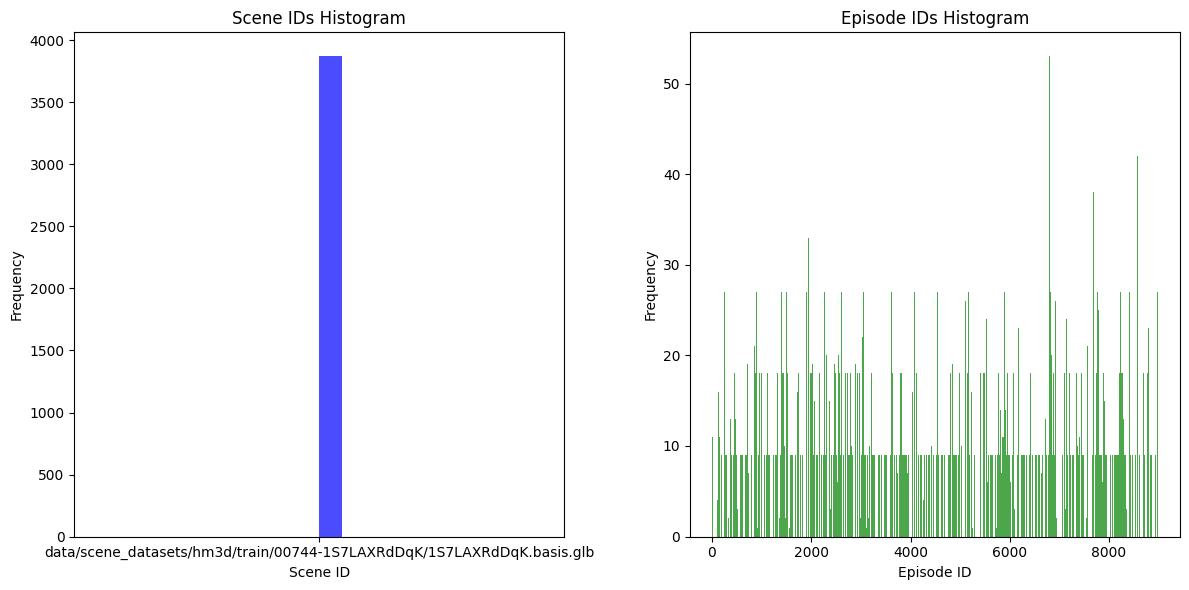

In [6]:
plot_histograms(scene_ids, episode_ids)